In [149]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier 


In [130]:
df=pd.read_csv('StudentsPerformance.csv')

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [132]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [133]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

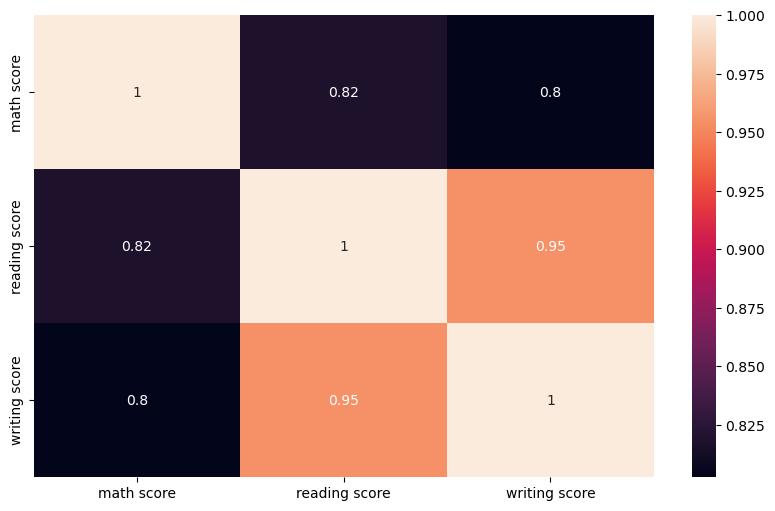

In [134]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

groub the categorical data together

In [135]:
categorical = [i for i in df.columns if df[i].dtype=='object']

categorical        

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

now let's understand each categorical feature and it's relation with target varible (math score)

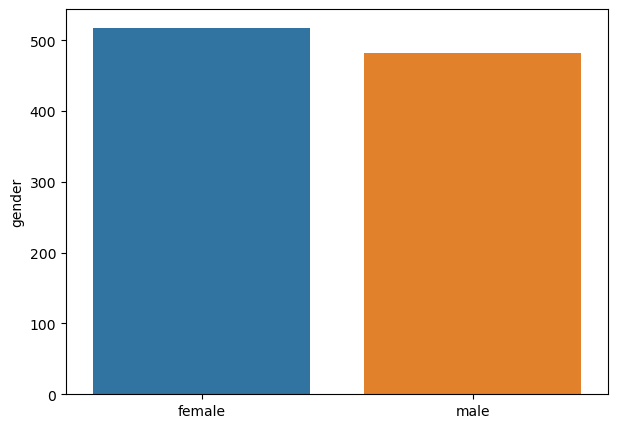

<Figure size 700x500 with 0 Axes>

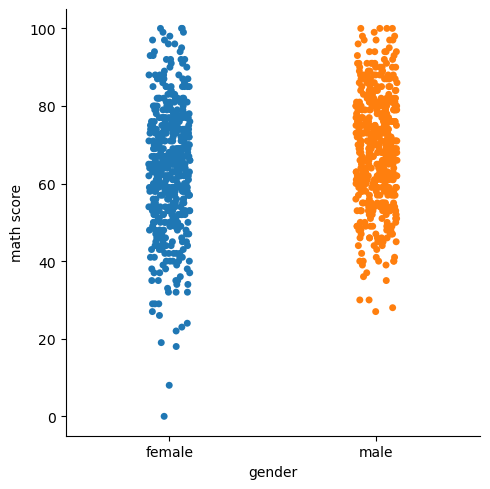

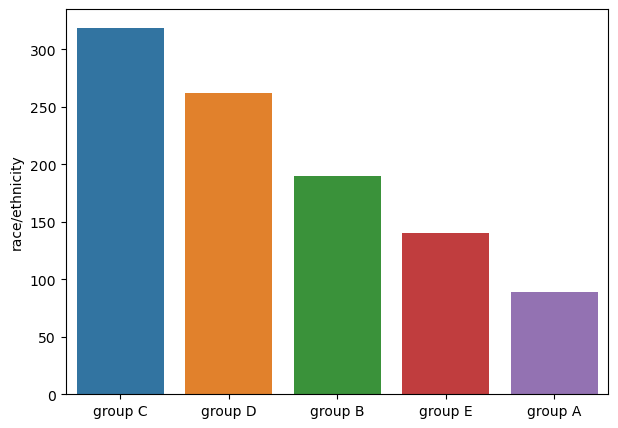

<Figure size 700x500 with 0 Axes>

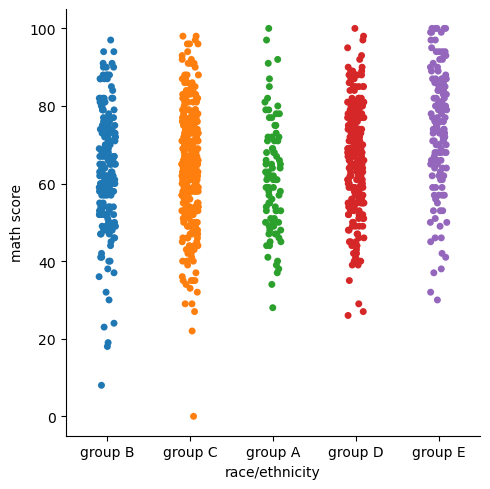

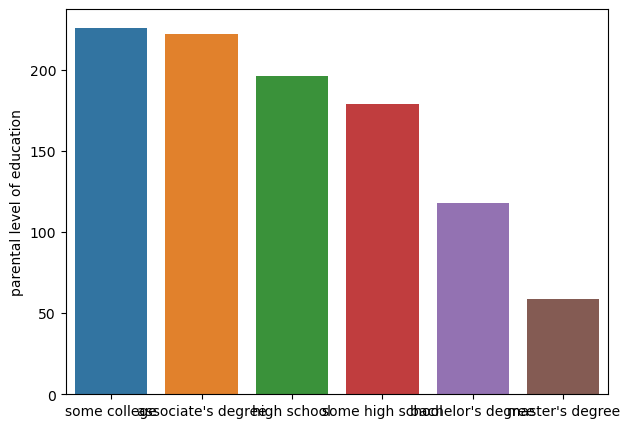

<Figure size 700x500 with 0 Axes>

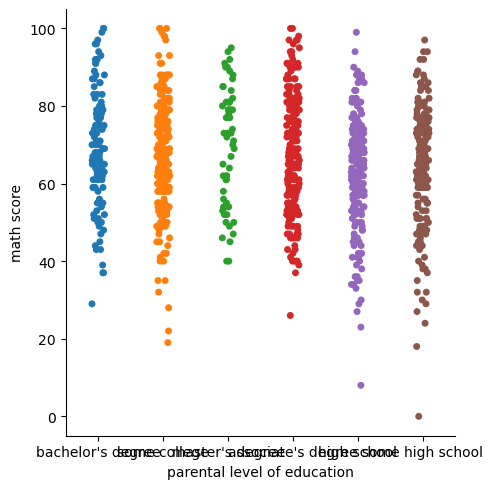

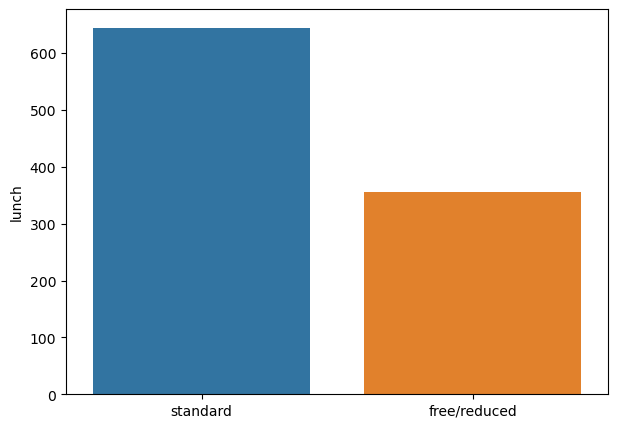

<Figure size 700x500 with 0 Axes>

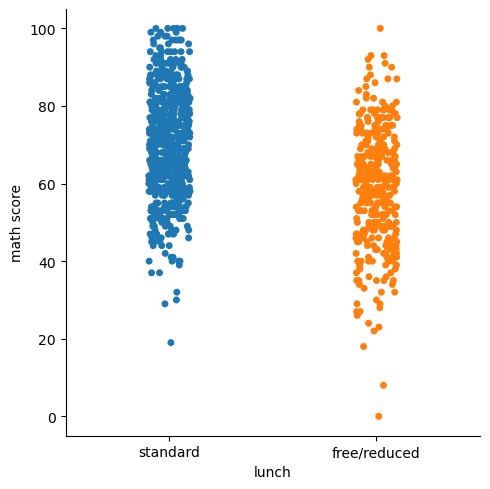

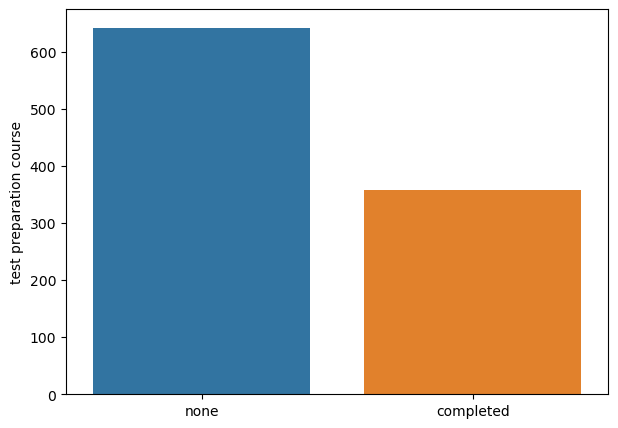

<Figure size 700x500 with 0 Axes>

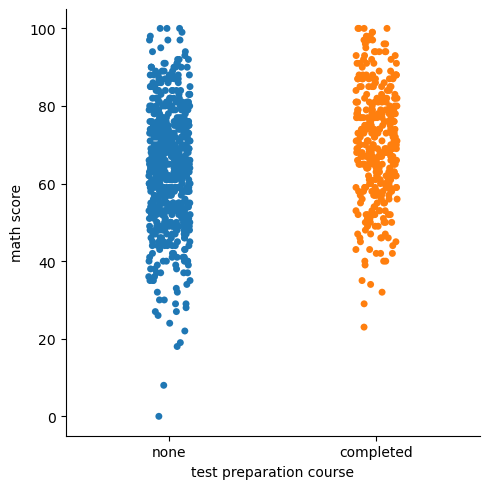

In [136]:
for i in categorical:
    plt.figure(figsize=(7,5))
    sns.barplot(data=df,x=df[i].value_counts().index,y=df[i].value_counts())
    plt.show()
    plt.figure(figsize=(7,5))
    sns.catplot(data=df,x=i,y='math score')
    plt.show()

it's not enough to inerpret the relation , so let's devide 'math score' to grades  ['A','B','C','D','F']  for better understanding

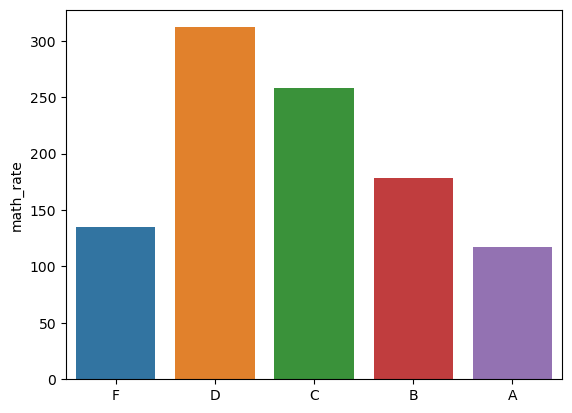

In [137]:
bins=[0,49,64,74,84,100]
lables=['F','D','C','B','A']
df['math_rate']=pd.cut(df['math score'], bins=bins,labels=lables, right=True, include_lowest=True)

sns.barplot(data=df,x=df['math_rate'].value_counts().index,y=df['math_rate'].value_counts())
plt.show()

In [138]:
print(df['math_rate'].dtype)
df['math_rate']=df['math_rate'].astype('object')
print(df['math_rate'].dtype)

category
object


now let's understand better using 'GroupBy'

In [139]:
for i in categorical:
    grade_distribution = df.groupby(i)['math_rate'].value_counts(normalize=True).unstack().fillna(0)
    print(display(grade_distribution))

math_rate,A,B,C,D,F
gender,,,,,
female,0.086873,0.148649,0.268340,0.330116,0.166023
male,0.149378,0.209544,0.246888,0.292531,0.101660


None


math_rate,A,B,C,D,F
race/ethnicity,,,,,
group A,0.067416,0.134831,0.202247,0.382022,0.213483
group B,0.089474,0.142105,0.252632,0.347368,0.168421
group C,0.090909,0.150470,0.266458,0.351097,0.141066
group D,0.106870,0.221374,0.274809,0.286260,0.110687
group E,0.264286,0.235714,0.250000,0.178571,0.071429


None


math_rate,A,B,C,D,F
parental level of education,,,,,
associate's degree,0.153153,0.202703,0.225225,0.297297,0.121622
bachelor's degree,0.169492,0.203390,0.271186,0.262712,0.093220
high school,0.056122,0.122449,0.285714,0.367347,0.168367
master's degree,0.186441,0.254237,0.169492,0.288136,0.101695
some college,0.115044,0.185841,0.265487,0.336283,0.097345
some high school,0.083799,0.156425,0.279330,0.279330,0.201117


None


math_rate,A,B,C,D,F
lunch,,,,,
free/reduced,0.03662,0.121127,0.208451,0.363380,0.270423
standard,0.16124,0.209302,0.285271,0.283721,0.060465


None


math_rate,A,B,C,D,F
test preparation course,,,,,
completed,0.173184,0.201117,0.282123,0.265363,0.078212
none,0.085670,0.165109,0.244548,0.338006,0.166667


None


let's interpret each feature:
_ gender: there is a notable gender disparity in student performance, with male students generally achieving higher grades than female students.

_ race/ethnicity: as expected it's an important feature as better student's performance at groub E decreasing until groub A.

_ parental level of education:higher parental education correlates with better student performance (bachelor's or master's degree) , while lower parental education correlates with poorer student performance (high school education or some high school education) and balanced distribution (some college education or an associate's degree) but still lean towards higher 'D' grades.

_lunch: students with standard lunch Tend to perform better, with a higher proportion receiving 'A' and 'B' grades while students with free/reduced lunch Tend to perform worse, with a much higher proportion receiving 'D' and 'F' grades.

_test preparation course: students who completed the test preparation course Tend to perform better, with a higher proportion receiving 'A', 'B', and 'C' grades, while students who did not complete the test preparation course tend to perform worse, with a higher proportion receiving 'D' and 'F' grades.




********Feature Engineering********

In [140]:
# create 'economic_state' to chech whether a bad state affect on student's performance
economic_states = []

for index, row in df.iterrows():
    lunch = row['lunch']
    parental_education = row['parental level of education']
    if lunch == 'free/reduced':
        economic_state = 'Low'
    elif lunch == 'standard' and parental_education in ["bachelor's degree", "master's degree"]:
        economic_state = 'High'
    else:
        economic_state = 'Medium'
    economic_states.append(economic_state)

df['economic_state'] = economic_states
df['economic_state']

0        High
1      Medium
2        High
3         Low
4      Medium
        ...  
995      High
996       Low
997       Low
998    Medium
999       Low
Name: economic_state, Length: 1000, dtype: object

In [141]:
grouped = df.groupby('economic_state')['math_rate'].value_counts(normalize=True).unstack().fillna(0)
print(display(grouped))

math_rate,A,B,C,D,F
economic_state,,,,,
High,0.238532,0.266055,0.256881,0.220183,0.018349
Low,0.036620,0.121127,0.208451,0.363380,0.270423
Medium,0.145522,0.197761,0.291045,0.296642,0.069030


None


as expected there is a a clear relationship between economic state and academic performance.

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
 8   math_rate                    1000 non-null   object
 9   economic_state               1000 non-null   object
dtypes: int64(3), object(7)
memory usage: 78.2+ KB


In [143]:
df=df.drop(['math score'],axis=1)
categorical.append('economic_state')
df=pd.get_dummies(df,columns=categorical)

In [144]:
df['math_rate']=df['math_rate'].astype(str).fillna('')
label_encoder = LabelEncoder()
df['math_rate_encoded'] = label_encoder.fit_transform(df['math_rate'])
X = df.drop(columns=['math_rate', 'math_rate_encoded'])
y = df['math_rate_encoded']

scaler= StandardScaler()
X_scaled=scaler.fit_transform(X)


In [145]:
X.shape

(1000, 22)

In [146]:
pca=PCA(n_components=.9)
X_pca=pca.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


In [147]:
X_pca.shape

(1000, 12)

In [152]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)
#model.score(X_train,y_train)
#model.score(X_test,y_test)
#CV  = cross_val_score(model,X_train, y_train,cv= 5)
#print(CV)
#print(CV.mean())
#RFC.fit(X_train, y_train)

# Predict on the test data

y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.46
Classification Report:
               precision    recall  f1-score   support

           A       0.41      0.39      0.40        18
           B       0.47      0.41      0.44        39
           C       0.41      0.47      0.44        49
           D       0.46      0.57      0.51        60
           F       0.63      0.35      0.45        34

    accuracy                           0.46       200
   macro avg       0.48      0.44      0.45       200
weighted avg       0.47      0.46      0.46       200

